In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)
meta_patients = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

meta_patients=meta_patients.drop("Study ID",axis=1)
print(data.shape)
print(meta_patients)


(20531, 518)
                   Patient ID  Diagnosis Age  \
Sample ID                                      
TCGA-05-4244-01  TCGA-05-4244           70.0   
TCGA-05-4249-01  TCGA-05-4249           67.0   
TCGA-05-4250-01  TCGA-05-4250           79.0   
TCGA-05-4382-01  TCGA-05-4382           68.0   
TCGA-05-4384-01  TCGA-05-4384           66.0   
...                       ...            ...   
TCGA-NJ-A55O-01  TCGA-NJ-A55O           56.0   
TCGA-NJ-A55R-01  TCGA-NJ-A55R           67.0   
TCGA-NJ-A7XG-01  TCGA-NJ-A7XG           49.0   
TCGA-O1-A52J-01  TCGA-O1-A52J           74.0   
TCGA-S2-AA1A-01  TCGA-S2-AA1A           68.0   

                 Neoplasm Disease Stage American Joint Committee on Cancer Code  \
Sample ID                                                                         
TCGA-05-4244-01                                                NaN                
TCGA-05-4249-01                                                NaN                
TCGA-05-4250-01               

In [2]:
print(data.isnull().sum().sum())
print(meta_patients.isnull().sum().sum())


2
25514


In [3]:
sel_index=data.apply(lambda x: (x==0).all(), axis = 0)
sel_index.index[sel_index]

Index([], dtype='object')

In [4]:
data_scaled = preprocessing.scale(data.iloc[:,1:])

data_scaled = pd.DataFrame(data_scaled, index =data.index , columns = data.columns[1:])
print(data_scaled.shape)
data_scaled.describe()



(20531, 517)


,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
count,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,...,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04
mean,-3.115773e-16,-1.279371e-16,-1.180710e-16,1.760426e-16,1.639365e-16,-5.013876e-17,-1.044819e-16,-5.187187e-18,2.994468e-16,-9.816857e-17,...,-5.840000e-16,-1.414641e-16,3.188910e-16,-1.227702e-16,-4.443650e-17,4.291036e-16,-8.778067e-17,2.858563e-17,-1.056851e-16,1.914812e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.379758e-01,-2.842081e-01,-2.626203e-01,-2.374016e-01,-2.168511e-01,-2.403818e-01,-2.170053e-01,-2.190499e-01,-1.699081e-01,-3.270922e-01,...,-1.642516e-01,-2.230331e-01,-2.491517e-01,-1.646211e-01,-3.036185e-01,-1.810726e-01,-2.682129e-01,-1.131176e-01,-1.543711e-01,-1.410340e-01
25%,-2.362731e-01,-2.821306e-01,-2.611826e-01,-2.352066e-01,-2.151068e-01,-2.388122e-01,-2.161395e-01,-2.184867e-01,-1.689584e-01,-3.247188e-01,...,-1.632408e-01,-2.215395e-01,-2.475431e-01,-1.631929e-01,-2.990303e-01,-1.798631e-01,-2.636506e-01,-1.126076e-01,-1.533358e-01,-1.395579e-01
50%,-1.869794e-01,-2.222808e-01,-2.078085e-01,-1.808513e-01,-1.668470e-01,-1.877570e-01,-1.747213e-01,-1.897625e-01,-1.376212e-01,-2.500801e-01,...,-1.320914e-01,-1.759019e-01,-1.948448e-01,-1.271216e-01,-2.086346e-01,-1.419273e-01,-1.970830e-01,-9.333137e-02,-1.241266e-01,-1.070846e-01
75%,-3.194700e-02,-2.393561e-02,-3.748754e-02,-2.688335e-02,-1.683461e-02,-2.903397e-02,-3.358210e-02,-6.470214e-02,-2.610938e-02,-3.993109e-03,...,-3.097049e-02,-2.123178e-02,-3.330729e-02,-1.620096e-02,1.097588e-02,-2.443665e-02,-1.227663e-02,-2.203986e-02,-2.549846e-02,-2.101192e-02
max,6.888929e+01,4.859775e+01,4.731961e+01,5.039623e+01,9.873500e+01,8.431307e+01,6.340503e+01,7.342163e+01,8.200304e+01,3.874696e+01,...,8.471857e+01,9.757246e+01,5.011805e+01,1.165459e+02,5.436600e+01,8.561694e+01,6.685034e+01,1.094149e+02,1.104419e+02,1.093210e+02


In [5]:
import matplotlib.pyplot as plt
meta_patients.loc[:,"Sex"]=meta_patients.loc[:,"Sex"].map({'MALE':'Male','Male':'Male','Female':'Female'})
values_sex=meta_patients.groupby("Sex").size()
print(values_sex)
fracs = [277, 240]
total = sum(fracs)
plt.pie(values_sex, labels = values_sex.index,
        autopct= lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True, startangle=90, explode = (0, 0.1))
plt.axis('equal')
plt.show()

Sex
Female    277
Male      240
dtype: int64


<Figure size 640x480 with 1 Axes>

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


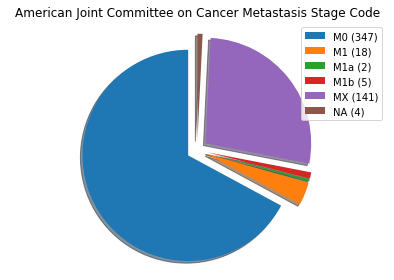

In [6]:
values_metastasis=meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size()
# nas = meta_patients.loc[:,"American Joint Committee on Cancer Metastasis Stage Code"].isnull().sum()
# values_metastasis.append(nas)
print(values_metastasis)
patches, text= plt.pie(values_metastasis,
        shadow=True, startangle=90, explode = (0.1,0.1,0.1,0.1,0.1,0.1))
labels= ["M0 (347)","M1 (18)","M1a (2)","M1b (5)", "MX (141)", "NA (4)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Metastasis Stage Code')
plt.tight_layout()
plt.show()

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


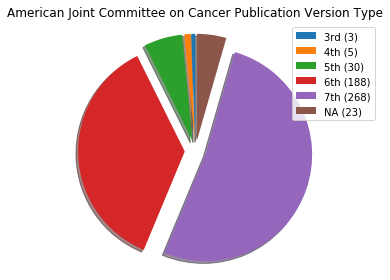

In [7]:
print(meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size())
values_ajcc_staging=meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size()
fracs = [3,5,30,188,268,23]
total = sum(fracs)
patches, text= plt.pie(values_ajcc_staging, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels= ["3rd (3)","4th (5)","5th (30)","6th (188)", "7th (268)", "NA (23)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Publication Version Type')
plt.tight_layout()
plt.show()

In [8]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
meta_patients.dtypes

Patient ID                                                                          object
Diagnosis Age                                                                      float64
Neoplasm Disease Stage American Joint Committee on Cancer Code                     float64
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage    float64
American Joint Committee on Cancer Metastasis Stage Code                            object
                                                                                    ...   
Primary Therapy Outcome Success Type                                                object
Tumor Site                                                                          object
Person Neoplasm Status                                                              object
Vial number                                                                         object
Patient's Vital Status                                                              object

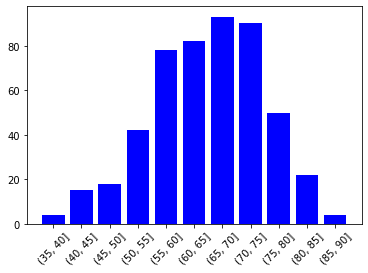

In [10]:
df = meta_patients.groupby('Diagnosis Age').size()
bins = pd.cut(meta_patients.loc[:,'Diagnosis Age'], np.arange(35,91,5))
df=meta_patients.groupby(bins)['Diagnosis Age'].agg(['count'])


nas = meta_patients.loc[:,'Diagnosis Age'].isnull().sum()
indexes = [str(c) for c in df.index]
values = [v[0] for v in df.values]


plt.bar(indexes ,values ,color='b')
plt.xticks(indexes, rotation='45')
plt.show()

In [11]:
data_scaled.isnull().sum().sum()

0

In [12]:
#the followig code verifies whether there is repeated patients identifiers or not
patients_list = data_scaled.columns.tolist()
res = []
seen = []
for patient in patients_list:
    if patient in seen:
        res.append(patient)
    else:
        seen.append(patient)
print(res)




[]


In [13]:
print(meta_patients.shape)

(517, 106)


In [14]:
sel_index=meta_patients.apply(lambda x: (x.isnull()).all(), axis = 0)
labels_with_data = sel_index[sel_index==False].index.tolist()
print(len(labels_with_data))

meta_patients = meta_patients.loc[:,labels_with_data]
print(meta_patients.shape)
print(data_scaled.shape)


80
(517, 80)
(20531, 517)


In [15]:
meta_patients

,Patient ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,ALK Analysis Type,ALK Translocation Status,Cancer Type,Cancer Type Detailed,Carbon monoxide diffusion dlco,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Disease Free (Months),Disease Free Status,Disease code,Performance Status,Ethnicity Category,Fev1 fvc ratio postbroncholiator,Fev1 fvc ratio prebroncholiator,Fev1 percent ref postbroncholiator,Fev1 percent ref prebroncholiator,Form completion date,Fraction Genome Altered,Neoplasm Histologic Type Name,Neoadjuvant Therapy Type Administered Prior To Resection Text,Prior Cancer Diagnosis Occurence,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Year Cancer Initial Diagnosis,Is FFPE,Karnofsky Performance Score,Kras gene analysis indicator,KRAS Mutation,Kras mutation identified type,Location lung parenchyma,Longest Dimension,Mutation Count,Mutation Status,Mutation Type,New Neoplasm Event Post Initial Therapy Indicator,Oct embedded,Oncotree Code,Overall Survival (Months),Overall Survival Status,Other Patient ID,Other Sample ID,Pathology Report File Name,Pathology report uuid,Performance Status Assessment Timepoint Category,Primary Other Site of Disease Name,Patient Primary Tumor Site,Project code,Tissue Prospective Collection Indicator,Pulmonary function test indicator,Race Category,Did patient start adjuvant postoperative radiotherapy?,Surgical Margin Resection Status,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Initial Weight,Sample Type,Sample type id,Sex,Shortest Dimension,Person Cigarette Smoking History Pack Year Value,Started Smoking Year,Stopped Smoking Year,Specimen Second Longest Dimension,Adjuvant Postoperative Targeted Therapy Administered Indicator,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,M1,N2,Stage IV,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,0.00,DiseaseFree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.4565,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2009.0,NO,NaN,NaN,NaN,NaN,Peripheral Lung,1.1,NaN,NaN,NaN,NaN,NaN,LUAD,0.00,LIVING,34040b83-7e8a-4264-a551-b16621843e28,bac0b02d-ac3b-4784-b8bf-180eadd548a3,TCGA-05-4244.3a844132-f813-4d8e-8f7d-dbae0b23d...,3a844132-f813-4d8e-8f7d-dbae0b23d7fd,NaN,NaN,R-Lower,NaN,NO,NaN,NaN,NaN,RX,YES,1,NaN,Primary,1,Male,0.3,38.0,NaN,NaN,0.9,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,M0,N0,Stage IB,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,50.03,DiseaseFree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.2221,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2007.0,NO,NaN,NaN,NaN,NaN,Peripheral Lung,1.4,288.0,NaN,NaN,NaN,NaN,LUAD,50.03,LIVING,4addf05f-3668-4b3f-a17f-c0227329ca52,80f196fe-1eaf-40cb-ab58-c84795acc5c7,TCGA-05-4249.7e920317-d5c2-4160-9e2b-ef0101eb5...,7e920317-d5c2-4160-9e2b-ef0101eb5a23,NaN,NaN,R-Lower,NaN,NO,NaN,NaN,NaN,R0,YES,1,NaN,Primary,1,Male,0.4,52.0,NaN,NaN,0.8,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,M0,N1,Stage IIIA,6th,T3,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.2362,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2007.0,NO,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,LUAD,3.98,DECEASED,f98ecd8a-b878-4f53-

In [16]:
quantity_na = meta_patients.apply(lambda x: (x.isnull()).sum(), axis = 0)
print(str(quantity_na[quantity_na!=0].index.size) + " labels with more than one NA")
print(str(quantity_na[quantity_na!=0].sum()) + " NAs")


59 labels with more than one NA
12072 NAs


In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

print(meta_patients.columns.tolist())

print(meta_patients.groupby("Patient's Vital Status").size())


# ind=subset_meta_patients.groupby('VITAL_STATUS').size().index
# values = subset_meta_patients.groupby('VITAL_STATUS').size().tolist()
# plt.bar(ind, values,color=('c','k'))
# plt.xticks(ind)
# plt.show()


# data_control = data_scale[meta["Muscle.loss"]=="control"]
# data_control.iloc[:,[13,17,19]].plot.bar()

['Patient ID', 'Diagnosis Age', 'American Joint Committee on Cancer Metastasis Stage Code', 'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code', 'Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 'American Joint Committee on Cancer Publication Version Type', 'American Joint Committee on Cancer Tumor Stage Code', 'ALK Analysis Type', 'ALK Translocation Status', 'Cancer Type', 'Cancer Type Detailed', 'Carbon monoxide diffusion dlco', 'Days to Sample Collection.', 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value', 'Disease Free (Months)', 'Disease Free Status', 'Disease code', 'Performance Status', 'Ethnicity Category', 'Fev1 fvc ratio postbroncholiator', 'Fev1 fvc ratio prebroncholiator', 'Fev1 percent ref postbroncholiator', 'Fev1 percent ref prebroncholiator', 'Form completion date', 'Fraction Genome Altered', 'Neoplasm Histologic Type Name', 'Neoadjuvant Therapy Type Administered Prior To Resection Text', 'Prior Cancer Di

In [82]:
print(meta_patients.groupby('Stopped Smoking Year').size())
print()
print(meta_patients.groupby('Patient\'s Vital Status').size())
print()
print(meta_patients.astype(str).groupby("Disease Free Status").size())
print()
print(meta_patients.groupby('Diagnosis Age').size())
print()
print(meta_patients.loc[:,'Diagnosis Age'].isnull().sum())
print()
print(meta_patients.groupby('Diagnosis Age').size())

Stopped Smoking Year
1948.0     1
1955.0     1
1961.0     1
1962.0     1
1964.0     1
1965.0     2
1967.0     3
1968.0     2
1971.0     1
1972.0     4
1973.0     1
1974.0     2
1975.0     5
1976.0     5
1977.0     1
1978.0     1
1979.0     2
1980.0     5
1981.0     6
1982.0     6
1983.0     6
1984.0     6
1985.0    12
1986.0     7
1987.0     4
1988.0     4
1989.0     3
1990.0     4
1991.0     5
1992.0     1
1993.0     7
1994.0     6
1995.0     6
1996.0     5
1997.0     3
1998.0     6
1999.0     8
2000.0     3
2001.0     5
2002.0     7
2003.0     5
2004.0    10
2005.0     7
2006.0    11
2007.0    11
2008.0     7
2009.0    10
2010.0     9
2011.0    16
2012.0    14
2013.0     1
dtype: int64

Patient's Vital Status
Alive    330
Dead     187
dtype: int64

Disease Free Status
DiseaseFree            252
Recurred/Progressed    185
nan                     80
dtype: int64

Diagnosis Age
38.0     1
39.0     1
40.0     2
41.0     4
42.0     5
43.0     1
44.0     1
45.0     4
46.0     2
47.0     3


In [19]:
meta_patients.astype(str).groupby("Patient Smoking History Category").size()

Patient Smoking History Category
1.0     76
2.0    119
3.0    135
4.0    169
5.0      4
nan     14
dtype: int64

In [20]:
data_scaled = data_scaled.transpose()

0


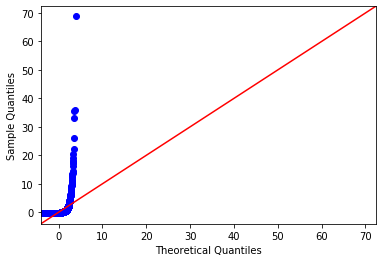

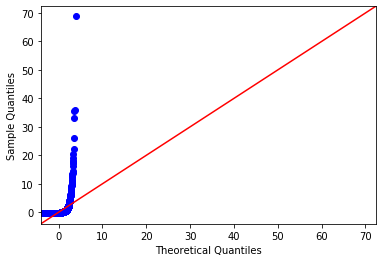

In [21]:
from scipy import stats
p_values=[]
for sample in data_scaled.index.tolist():
    w, p_value = stats.shapiro(np.random.choice(data_scaled.loc[sample],500))
    p_values.append(p_value)

counter = 0
for p_value in p_values:
    if p_value>=0.05:
        counter+=1

print(counter)

test = data_scaled.iloc[0]
sm.qqplot(test,line='45')



In [22]:
patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient's Vital Status",meta_patients.loc[:,"Patient's Vital Status"])
interest_vital_status = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient's Vital Status"] == grp] for grp in ['Dead', 'Alive']}
    f, p = stats.kruskal(l_data['Dead'],l_data['Alive'])
    if p<0.05:
        interest_vital_status.append(ids)

len(interest_vital_status)

12926

In [84]:
patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient Smoking History Category",meta_patients.loc[:,"Patient Smoking History Category"])
interest_smoking = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient Smoking History Category"] == grp] for grp in [1,2,3,4,5]}
    f, p = stats.kruskal(l_data[1],l_data[4],l_data[3])
    if p<0.05:
        interest_smoking.append(ids)
interest_smoking

[10431,
 13,
 9625,
 18,
 21,
 23461,
 368,
 5825,
 5826,
 6059,
 10061,
 55324,
 25864,
 84836,
 10006,
 27,
 80325,
 30,
 32,
 80724,
 27034,
 36,
 35,
 91452,
 84680,
 59272,
 47,
 48,
 8310,
 52,
 80221,
 2180,
 51703,
 6296,
 84532,
 55902,
 60,
 71,
 86,
 10096,
 95,
 8038,
 8755,
 9507,
 9719,
 54507,
 79934,
 109,
 112,
 115,
 118,
 125,
 22850,
 84890,
 54936,
 150,
 157,
 165,
 3267,
 55109,
 10555,
 56894,
 8540,
 155465,
 85007,
 25909,
 191,
 27245,
 203,
 9472,
 10327,
 1645,
 1646,
 8574,
 22977,
 84335,
 64400,
 211,
 5832,
 219,
 217,
 221,
 8659,
 501,
 223,
 226,
 79087,
 79868,
 56052,
 10195,
 79053,
 240,
 80216,
 249,
 23600,
 81693,
 154796,
 119504,
 64682,
 51433,
 51434,
 23452,
 51129,
 283,
 288,
 404734,
 56172,
 54467,
 23141,
 51281,
 57037,
 55608,
 118932,
 84079,
 65124,
 22881,
 54443,
 10541,
 81611,
 84168,
 304,
 307,
 309,
 162,
 160,
 1175,
 327,
 27301,
 83464,
 334,
 128240,
 55911,
 341,
 347,
 348,
 81575,
 351,
 54840,
 360,
 362,
 369,
 37

In [104]:
import statsmodels.stats.multicomp as multi
l_data = {grp: mydata[ids][mydata.loc[:,"Patient Smoking History Category"] == grp] for grp in [1,2,3,4,5]}
mydata.loc[[l_data[2].index,l_data[3].index],interest_smoking[0]]
# x = pd.Series(mydata.loc[l_data[2].index,interest_smoking[0]].values, dtype=float)  #obrigatório definir dados como float em vez de object
# y = mydata["Patient Smoking History Category"]
# mcDate = multi.MultiComparison(x,y)
# Results = mcDate.tukeyhsd()
# print(Results)
# interest_smoking

ValueError: all arrays must be same length

In [23]:
meta_patients.loc[:,"Patient's Vital Status"].unique()

array(['Alive', 'Dead'], dtype=object)

[0.1953991  0.12312076 0.07834776 0.0630992  0.04769104 0.03317883
 0.02893597 0.02607918 0.02292542 0.01995502]


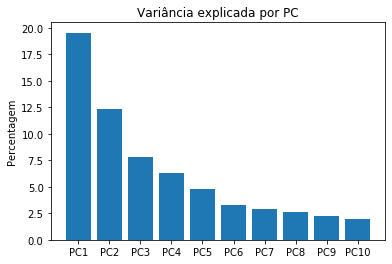

In [51]:
from sklearn.decomposition import PCA
n=10
pca_data = PCA(n_components=n)
pca_data.fit(data_scaled)
x_reduced = pca_data.transform(data_scaled)


print(pca_data.explained_variance_ratio_)  
plt.bar(range(n), pca_data.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

[[ 38.07388552 -29.6532233    1.68246488 ... -10.65637763  -1.42411584
   -0.59574008]
 [  4.83347152 -13.28033355  17.36583132 ... -14.28945062  -8.42866526
    5.98258399]
 [-36.19093898 -42.5107557    2.95772558 ... -15.20791241  -5.83562303
   -7.84065379]
 ...
 [103.8038881   -5.06208947  25.20164646 ...  -3.12835195   7.22279404
    0.60706039]
 [ 81.1530596   -4.61619717  -9.41025703 ...  11.80381449  24.29332918
   -0.83942093]
 [-32.77240865  92.2808158   -3.64250258 ...  -0.16201642   9.34480145
   23.36638799]]


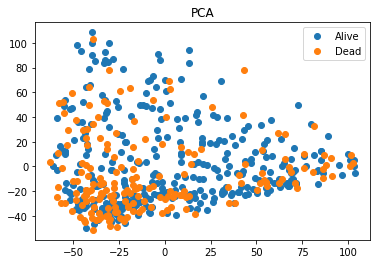

In [60]:
print(x_reduced)
mydata = data_scaled.reset_index(drop=True)
for status in meta_patients.loc[:,'Patient\'s Vital Status'].unique():
    sp = mydata.index[meta_patients.loc[:,'Patient\'s Vital Status']==status]
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=status)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

In [61]:
lst_variance=pca_data.explained_variance_ratio_
accum=0
i=0
while accum<0.90 and i<len(lst_variance):
    accum+=lst_variance[i]
    i+=1
print(i)

10


In [44]:
meta_patients.loc[:,"Patient's Vital Status"].index

ind=np.linspace(0,516,517,dtype=int)
mydata_meta=meta_patients.set_index(ind)
mydata_meta=mydata_meta["Patient's Vital Status"].dropna()


0      Alive
1      Alive
2       Dead
3      Alive
4      Alive
       ...  
512    Alive
513    Alive
514    Alive
515     Dead
516    Alive
Name: Patient's Vital Status, Length: 517, dtype: object

[[7.20000000e+01 2.99000000e+02 8.27172739e+02 2.00000000e+00]
 [1.54000000e+02 4.17000000e+02 9.15197839e+02 2.00000000e+00]
 [3.90000000e+01 4.77000000e+02 9.31399310e+02 2.00000000e+00]
 ...
 [4.18000000e+02 1.02900000e+03 3.61391987e+03 5.15000000e+02]
 [9.00000000e+00 1.03000000e+03 3.70393870e+03 5.16000000e+02]
 [3.44000000e+02 1.03100000e+03 4.01641895e+03 5.17000000e+02]]


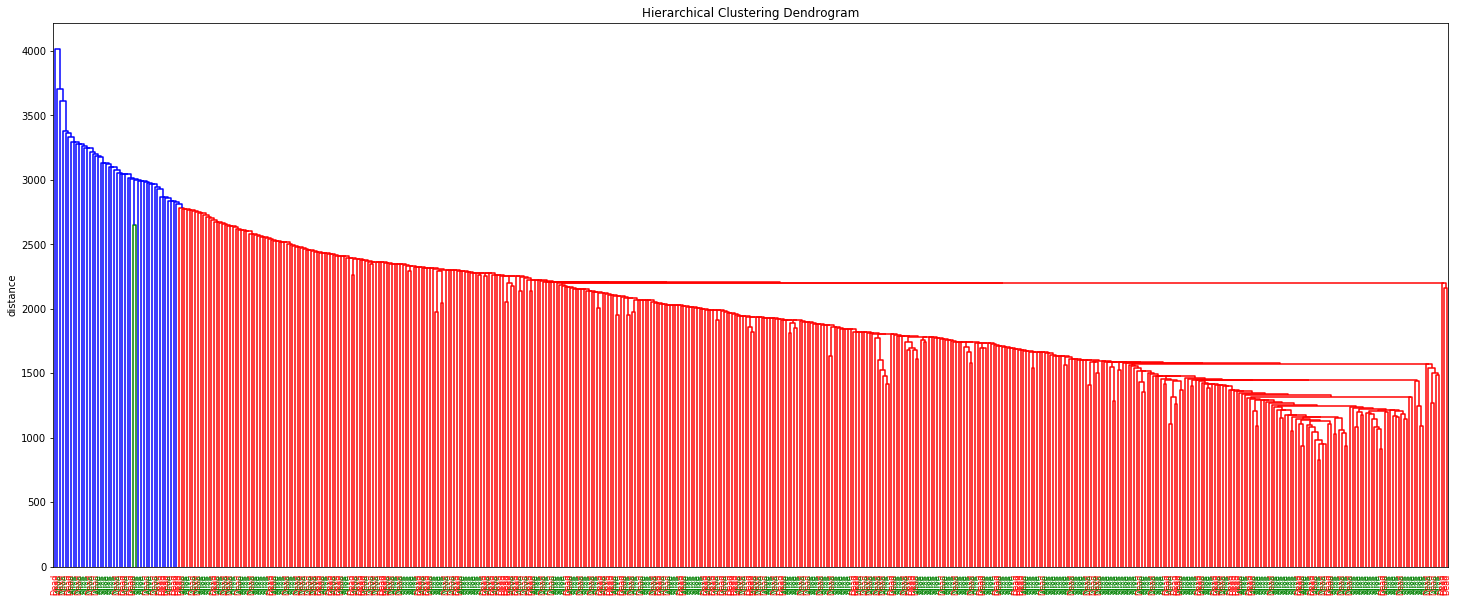

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled.iloc[mydata_meta.index,:], metric="cityblock")
print(Z)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(mydata_meta),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'Dead': 'r', 'Alive': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

In [65]:
from sklearn.cluster import KMeans

k=2
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_scaled)
labels =  kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,meta_patients.loc[:,"Patient's Vital Status"], rownames=['clusters'] )


Patient's Vital Status,Alive,Dead
clusters,,
0,135,49
1,195,138


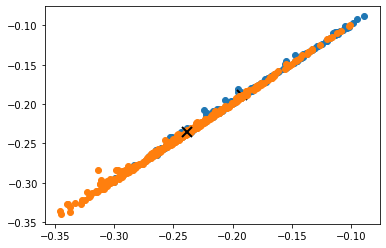

In [78]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = data_scaled.values[np.where(labels==i)]
    # plot the data observations (only 2 first colums)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
plt.show()